# Introduction to Data Science
## Homework 2

Student Name:
Chuan Long
Student Netid: 
cl4076

### Preparing a Training Set and Training a Decision Tree
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.

In [75]:
import pandas as pd
import numpy as np
# Load the dataset as dataframe object
df = pd.read_csv('data/cell2cell_data.csv', header = None, sep = ',')
# Label the dataset
df.columns = ['revenue', 'outcalls', 'incalls', 'months', 'eqpdays', 'webcap', 'marryyes', 'travel', 'pcown', 'creditcd', 'retcalls', 'churndep']
# Split the dataset using pandas
train_df = df.sample(frac = 0.8, random_state = 1)
test_df = df.drop(train_df.index)
# Another way to implement the split of dataset, not stable and not elegant
# df_split = np.random.rand(len(df)) < 0.8
# train_df = df[df_split].copy(deep = True)
# test_df = df[~df_split].copy(deep = True)

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [76]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
# Create the instance of DecisionTreeClassifier and fit the model
clf = DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(train_df.drop('churndep', 1), train_df.churndep)

4\. Using the resulting model from 2.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

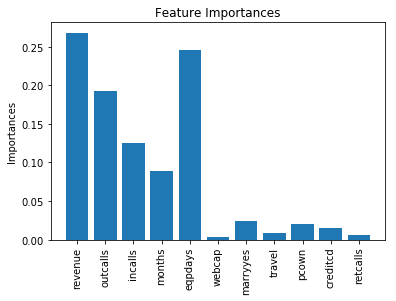

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the bar figure for the feature importances
label_names = train_df.drop('churndep', 1).columns.values
plt.bar(np.arange(11), clf.feature_importances_,)
plt.xticks(np.arange(11), label_names, rotation = 90)
plt.ylabel('Importances')
plt.title('Feature Importances')
plt.show()

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

In [ ]:
# Code/answer here

6\. Using the classifier built in 2.2, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

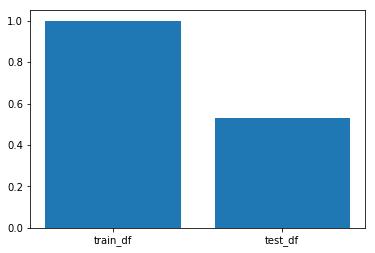

In [70]:
# Code here
train_accurancy = clf.score(train_df.drop('churndep', 1), train_df.churndep)
test_accurancy = clf.score(test_df.drop('churndep', 1), test_df.churndep)
accuracy = ['train_df', 'test_df']
plt.bar(range(2), [train_accurancy, test_accurancy])
plt.xticks(range(2), accuracy)
plt.show()

### Part 2 - Finding a Good Decision Tree
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [103]:
# Code here
# min_samples_split_values = None
# min_samples_leaf_values = None

# Big ranges for exploring the dataset
min_samples_split_values = [pow(2, i) for i in range(1, 11)]
min_samples_leaf_values = [int(pow(2, i) / 2) for i in range(1, 11)]

# Small ranges for debugging
# min_samples_split_values = [2, 4]
# min_samples_leaf_values = [1, 2]
min_samples_split_values, min_samples_leaf_values

([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024],
 [1, 2, 4, 8, 16, 32, 64, 128, 256, 512])

2\. Explain in words your reasoning for choosing the above ranges.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

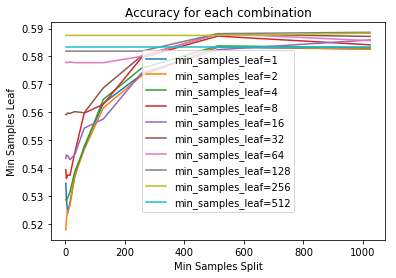

best_score = 0.5886853988961365
best_min_samples_leaf = 128
best_min_samples_split = 1024


In [104]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
# Define the function to get the Score
def getScore(train_df, test_df, split_value, leaf_value):
    clf = DecisionTreeClassifier(criterion = 'entropy',\
                                 min_samples_split = split_value,\
                                 min_samples_leaf = leaf_value)
    clf = clf.fit(train_df.drop('churndep', 1), train_df.churndep)
    return clf.score(test_df.drop('churndep', 1), test_df.churndep)

def plotAccuracy(train_df, test_df, min_samples_leaf_values, min_samples_split_values):
    # Train the classfier and get the mean score for each combination
    res = dict()
    best_score = 0
    best_combination = [1, 2]
    for leaf in min_samples_leaf_values:
        res[leaf] = list()
        for split in min_samples_split_values:
            score = getScore(train_df, test_df, split, leaf)
            res[leaf].append(score)
            if score > best_score:
                best_score = score
                best_combination = [leaf, split]
    
    # Plot the accuracy for each combination
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for leaf in min_samples_leaf_values:
        plt.plot(min_samples_split_values, res[leaf], label = 'min_samples_leaf={}'.format(leaf))
    plt.legend(loc = 10)
    ax.set_xlabel('Min Samples Split')
    ax.set_ylabel('Min Samples Leaf')
    plt.title('Accuracy for each combination')
    plt.show()
    return best_score, best_combination

best_score, best_combination = plotAccuracy(train_df, test_df, min_samples_leaf_values, min_samples_split_values)
print('best_score = {}'.format(best_score))
print('best_min_samples_leaf = {}'.format(best_combination[0]))
print('best_min_samples_split = {}'.format(best_combination[1]))

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

Solution: The configuration of the min_samples_leaf is 128 and the min_samples_split is 1024 has the best accuracy, which is approximately 0.59. As we can see, for the same min_samples_leaf values, the accuracy will be improved as the value of min_samples_split goes high. Now that, let's keep a high value of min_samples_split and explore the dataset, trying to get a better fitting result. 

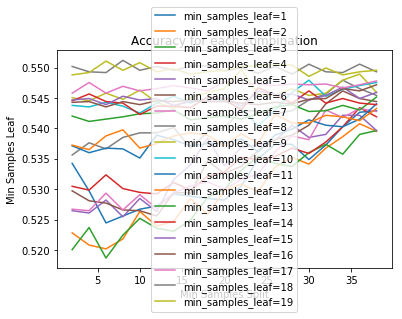

best_score = 0.551179126944305
best_min_samples_leaf = 18
best_min_samples_split = 8


In [111]:
split_values = [2 * i for i in range(1, 20)]
leaf_values = [i for i in range(1, 20)]
best_test_score, best_test_combination = plotAccuracy(train_df, test_df, leaf_values, split_values)
print('best_score = {}'.format(best_test_score))
print('best_min_samples_leaf = {}'.format(best_test_combination[0]))
print('best_min_samples_split = {}'.format(best_test_combination[1]))

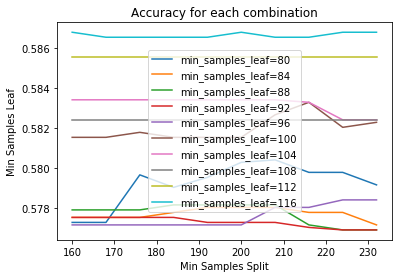

best_score = 0.5868038133467135
best_min_samples_leaf = 116
best_min_samples_split = 160


In [113]:
split_values = [8 * i for i in range(20, 30)]
leaf_values = [4 * i for i in range(20, 30)]
best_test_score, best_test_combination = plotAccuracy(train_df, test_df, leaf_values, split_values)
print('best_score = {}'.format(best_test_score))
print('best_min_samples_leaf = {}'.format(best_test_combination[0]))
print('best_min_samples_split = {}'.format(best_test_combination[1]))

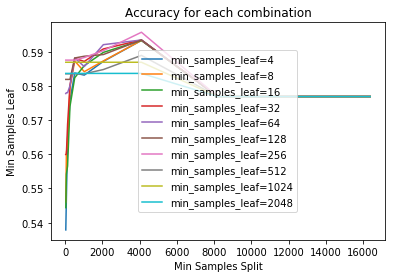

best_score = 0.5957099849473156
best_min_samples_leaf = 256
best_min_samples_split = 4096


In [116]:
split_values = [pow(2, i) for i in range(5, 15)]
leaf_values = [pow(2, i) for i in range(2, 12)]
best_test_score, best_test_combination = plotAccuracy(train_df, test_df, leaf_values, split_values)
print('best_score = {}'.format(best_test_score))
print('best_min_samples_leaf = {}'.format(best_test_combination[0]))
print('best_min_samples_split = {}'.format(best_test_combination[1]))

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

Answer here!